In [1]:
from google.colab import files
uploaded = files.upload()

Saving t10k-images.idx3-ubyte to t10k-images.idx3-ubyte
Saving t10k-labels.idx1-ubyte to t10k-labels.idx1-ubyte


In [2]:
from google.colab import files
uploaded = files.upload()

Saving train-labels-idx1-ubyte to train-labels-idx1-ubyte


In [4]:
from google.colab import files
uploaded = files.upload()

Saving train-images.idx3-ubyte to train-images.idx3-ubyte


In [6]:
import os
print(os.listdir())

['.config', 'train-labels-idx1-ubyte', 'train-images.idx3-ubyte', 't10k-images.idx3-ubyte', 't10k-labels.idx1-ubyte', 'sample_data']


In [9]:
import numpy as np

def load_images(filename):
    with open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    return data.reshape(-1, 28, 28)

def load_labels(filename):
    with open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

# Load training and test sets
X_train = load_images('train-images.idx3-ubyte')
y_train = load_labels('train-labels-idx1-ubyte')
X_test = load_images('t10k-images.idx3-ubyte')
y_test = load_labels('t10k-labels.idx1-ubyte')

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (60000, 28, 28) (60000,)
Test: (10000, 28, 28) (10000,)


In [11]:
X_train = load_images('train-images.idx3-ubyte')
y_train = load_labels('train-labels-idx1-ubyte')
X_test = load_images('t10k-images.idx3-ubyte')
y_test = load_labels('t10k-labels.idx1-ubyte')

In [12]:
from sklearn.preprocessing import StandardScaler

X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.4f}")

K=3, Accuracy=0.9452
K=5, Accuracy=0.9443
K=7, Accuracy=0.9433
K=9, Accuracy=0.9429


In [15]:
import matplotlib.pyplot as plt

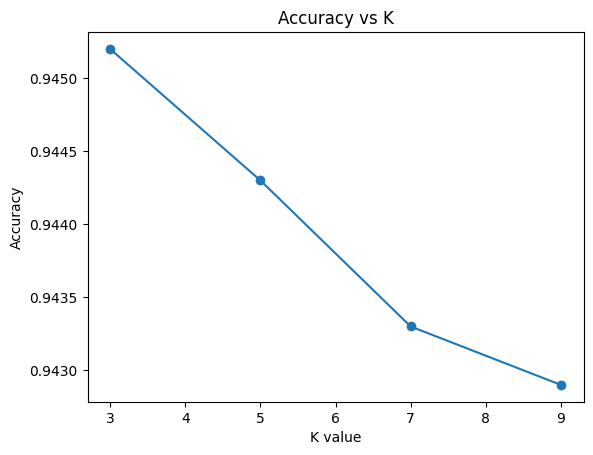

In [16]:
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.show()

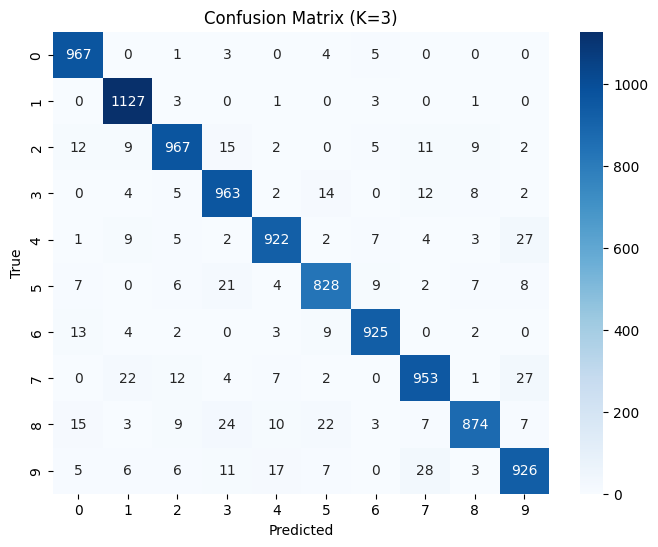

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Pick the best K (highest accuracy)
best_k = k_values[np.argmax(accuracies)]
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_best = knn_best.predict(X_test_scaled)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix (K={best_k})")
plt.show()

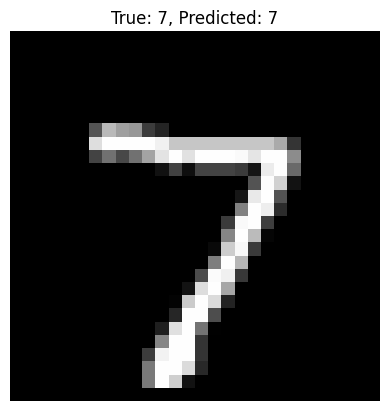

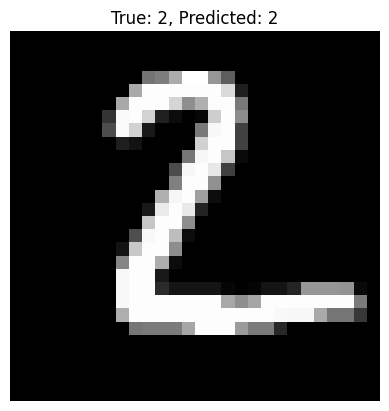

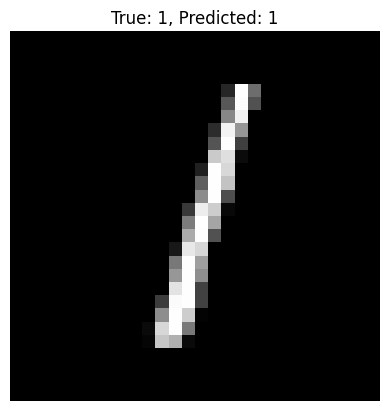

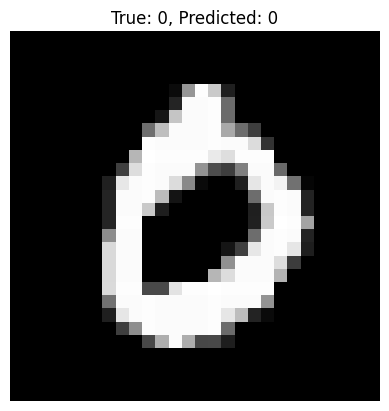

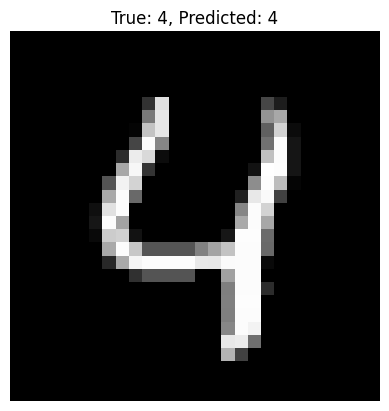

In [18]:
for i in range(5):
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]}, Predicted: {y_pred_best[i]}")
    plt.axis('off')
    plt.show()